# Analysis of Effective Altruism Facebook Group Posts
## 2012 - 2015

Data taken from https://docs.google.com/spreadsheets/d/1zRc2AvZ_nWEyXdOPz9XzjuXszMa92C9WUSVOul-NJyo/edit#gid=1562892504



### Growth

NB: "Posts" in the spreadsheet includes both "status" posts and "link" posts, I refer to them accordingly as "status-posts" and "link-posts." Status-posts are where someone writes some text and shares vs sharing a link to the group. There were also an insignificant number of "other" types including photo, video, and music.

* The total number of status-posts has remained constant for the last three years (Figure 1). 
* The number of link-containing posts has increased year-on-year by ~25% (Figure 1).
* Because of increase in link-posts, the total number of posts (of all types) is increasing annually.
* The group was started in late 2012 but had 23 posts for the year, compared with 1300+ for subsequent years (Table 1).


### Comments
* The absolute number of comments has been decreasing annually, despite increased number of overall posts (Figure 2). 
    - The number of comments per status-post has dropped from an average of 11 in 2013, to 8 in 2015
 
 
### Other Comparison of Status- and Link-Posts
* Status-posts receive an average of 10 comments per post compared to 5 comments per post for link-posts.
* Link-posts receive slightly more likes on average than status-posts, 9.3 vs. 7.2.
* Link-posts receive more than 30 times the number of shares as status-posts on average. This explains the large increase in number of shares in 2015.

### Contributors
* The number of unique contributors has increased linearly since 2013.
* Half or more of the top contributors list has stayed the same since 2013.
* See below for Leaderboards for Top Contributors for 2013,2014,2015 and All Time.


### Monthly Variation
* Compared with the preceding 12-months, there was a dip in activity from mid-2014 to early 2015. I don't why. Things started going back up sometime between February and June. I didn't get a chance to look into the changes on that finer time-scale. Does anybody know what's changed with the group from last year to this year?


## Conclusion
Overall group activity has been increasing since 2012, however the composition and nature of the activity has changed. While the number of status-posts has stayed constant since 2013, the proportion of total posts has dropped. In 2013, the number of statuses posted and links posted were roughly equal, whereas in 2015, 50% more links were posted than statuses. Additionally, the number of comments per status-post has been dropping since 2013.

There has been an annual increase in 

Questions I didn't attempt to answer.
Are the additional posters providing value? Do their posts get as many likes/shares/comments, or are they opportunistically posting on a large group?

In [242]:
# Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [82]:
posts = pd.read_csv('Effective Altruism facebook group posts data - posts (1).csv')
posts['createdTime'] = pd.to_datetime(posts['createdTime'])
posts['year'] = posts['createdTime'].apply(lambda x: x.year)
posts['week'] = posts['createdTime'].apply(lambda x: x.week)
posts['month'] = posts['createdTime'].apply(lambda x: x.month)
posts['quarter'] = posts['createdTime'].apply(lambda x: x.quarter)

### Figure 1: Number of Posts by Type vs. Year

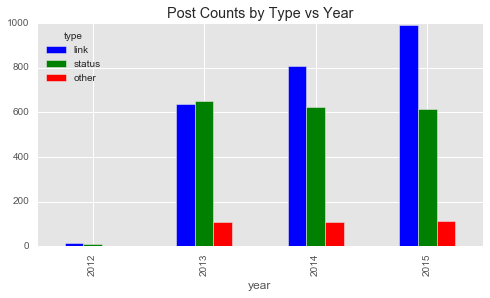

In [258]:
postsTypes = posts.groupby(['year','type']).count()['id'].unstack()
postsTypes.fillna(0,inplace=True)

otherCols = set(list(postsTypes.columns))
mainCols = set(['link','status'])
otherCols = otherCols-mainCols
otherCols = list(otherCols)

postsTypes['other'] = postsTypes[otherCols].sum(axis=1)
postsTypes.drop(otherCols,axis=1,inplace=True)

fig = postsTypes.plot(kind='bar',figsize=(8,4))
fig.set_title("Post Counts by Type vs Year")

### Table 1: Number of Posts by Year
* The group was started in late 2012 but had 23 posts for the year, compared with 1300+ for subsequent years (Table 1).

In [243]:
postsY = posts.groupby(['year']).agg({'likesCount' : np.sum,'commentsCount' : np.sum,'sharesCount' : np.sum,'id': 'count'})
postsY.rename(columns={'id':'postsCount'},inplace=True)
postsY.sort_index()

sharesCount  postsCount  likesCount  commentsCount
year                                                    
2012            5          23          96             85
2013          447        1398        7658          12087
2014          508        1543       12617          10929
2015         1038        1719       18385           9767

### Figure 2: Activity Counts vs Year
* Because of increase in link-posts, the total number of posts (of all types) is increasing annually.
* The absolute number of comments has been decreasing annually, despite increased number of overall posts (Figure 2). 



c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


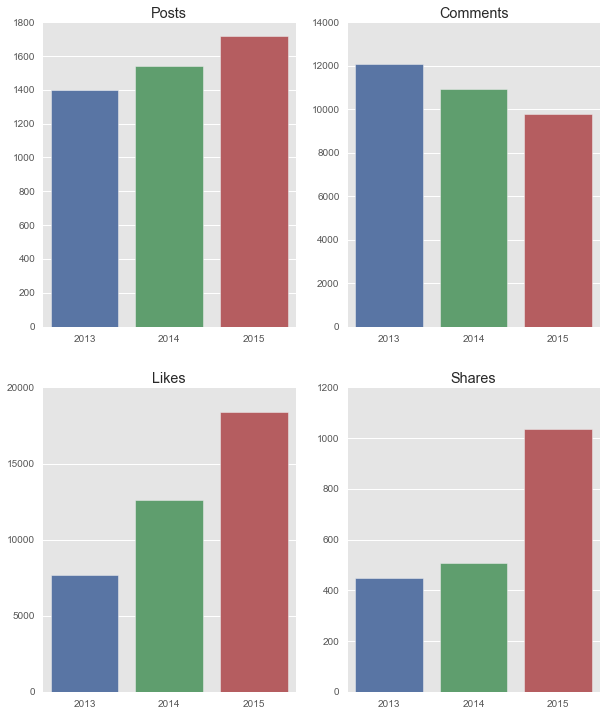

In [234]:
#postsY.reset_index(inplace=True)
fig, Ax = plt.subplots(2,2,figsize=(10,12))

sns.barplot(y='postsCount',x='year',data=postsY,ax=Ax[0,0])

sns.barplot(y='commentsCount',x='year',data=postsY,ax=Ax[0,1])
sns.barplot(y='likesCount',x='year',data=postsY,ax=Ax[1,0])
sns.barplot(y='sharesCount',x='year',data=postsY,ax=Ax[1,1])

Ax[0,0].set_title('Posts'); Ax[0,0].set_xlabel(''); Ax[0,0].set_ylabel('')
Ax[0,1].set_title('Comments')
Ax[0,1].set_xlabel('')
Ax[0,1].set_ylabel('')
Ax[1,0].set_title('Likes')
Ax[1,0].set_xlabel('')
Ax[1,0].set_ylabel('')
Ax[1,1].set_title('Shares')
Ax[1,1].set_xlabel('')
Ax[1,1].set_ylabel('')

plt.savefig('AnnualGrowthEAFacebook.png')
#Dammit, what's the command to turn off axis labels?

### Table 2: Average Likes/Comments/Shares for Status Posts
    - The number of comments per status-post has dropped from an average of 11.3 in 2013, to 7.8 in 2015 (Table 2)


In [224]:
postsTypes = posts[(posts['type']=='status')].groupby(['year','type']).mean()
postsTypes[['likesCount','commentsCount','sharesCount']].round(2)

likesCount  commentsCount  sharesCount
year type                                          
2012 status        3.67           1.22         0.00
2013 status        5.14          11.27         0.01
2014 status        7.34          10.10         0.02
2015 status        9.32           7.79         0.04

### Table 3: Likes/Comments/Shares for Status vs Links
* Status-posts receive an average of 9.7 comments per post compared to 5.4 comments per post for link-posts (Table 3).
* Link-posts receive slightly more likes on average than status-posts, 9.3 vs. 7.2 (Table 3).
* Link-posts receive more than 30 times the number of shares as status-posts on average. This explains the large increase in number of shares in 2015.

In [235]:
postsTypes = posts[(posts['type']=='link')|(posts['type']=='status')].groupby(['type']).mean()
postsTypes[['likesCount','commentsCount','sharesCount']].round(2)


likesCount  commentsCount  sharesCount
type                                          
link          9.29           5.37         0.72
status        7.21           9.71         0.02

### Figure 3: Monthly Variation

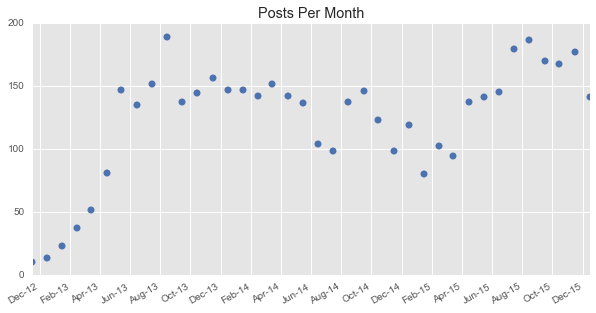

In [301]:
postsW = posts.groupby(['year','month']).agg({'likesCount' : np.sum,'commentsCount' : np.sum,'sharesCount' : np.sum,'id': 'count'})
postsW.rename(columns={'id':'postsCount'},inplace=True)
postsW['date_month'] = [datetime.datetime(a[0],a[1],15,0,0) for a in list(postsW.index)]

months = MonthLocator(interval=2)
monthsFmt = DateFormatter("%b-%y")
fig, (ax1) = plt.subplots(1,1,figsize=(10,5),sharex=False)
ax1.plot_date(postsW['date_month'],postsW['postsCount'],)
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(monthsFmt)

fig.autofmt_xdate()
ax1.autoscale_view()
ax1.set_title('Posts Per Month')


In [88]:
datetime.datetime(2015,2,10)

datetime.datetime(2015, 2, 10, 0, 0)

In [71]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
months = MonthLocator()
monthsFmt = DateFormatter("%b-%y")

In [103]:
postsM.reset_index(inplace=True)

In [100]:
postsM = postsW
postsM.reset_index().head(2)

year  month  sharesCount  postsCount  likesCount  commentsCount date_month
0  2012     11            1          10          60             54 2012-11-15
1  2012     12            4          13          36             31 2012-12-15

In [108]:
postsM.head(2)

year  month  sharesCount  postsCount  likesCount  commentsCount date_month  \
0  2012     11            1          10          60             54 2012-11-15   
1  2012     12            4          13          36             31 2012-12-15   

                                          month-year  
0  0     11\n1     12\n2      1\n3      2\n4     ...  
1  0     11\n1     12\n2      1\n3      2\n4     ...

In [107]:
postsM['month-year'] = str(postsM['month'])+'-'+ str(postsM['year'])

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


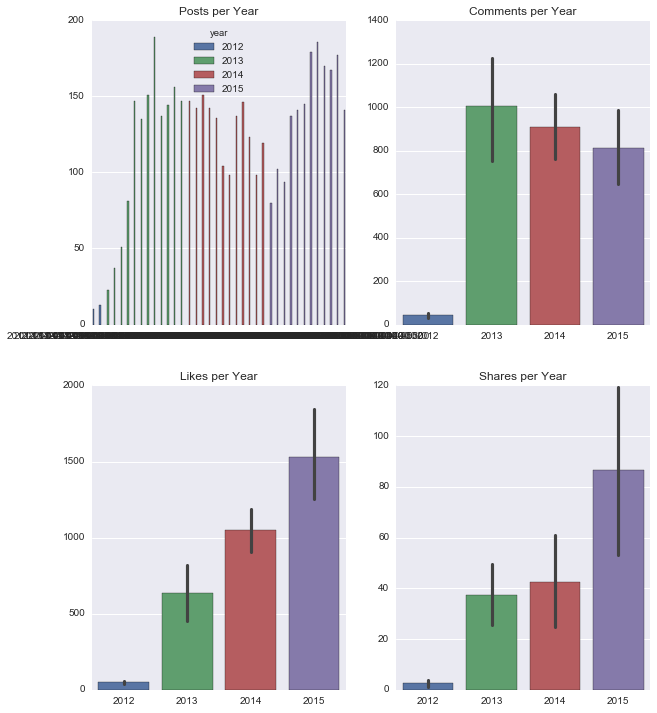

In [109]:
#postsY.reset_index(inplace=True)
fig, Ax = plt.subplots(2,2,figsize=(10,12))

sns.barplot(y='postsCount',x='date_month',data=postsM,ax=Ax[0,0],hue='year')

sns.barplot(y='commentsCount',x='year',data=postsM,ax=Ax[0,1])
sns.barplot(y='likesCount',x='year',data=postsM,ax=Ax[1,0])
sns.barplot(y='sharesCount',x='year',data=postsM,ax=Ax[1,1])

Ax[0,0].set_title('Posts per Year'); Ax[0,0].set_xlabel(''); Ax[0,0].set_ylabel('')
Ax[0,1].set_title('Comments per Year')
Ax[0,1].set_xlabel('')
Ax[0,1].set_ylabel('')
Ax[1,0].set_title('Likes per Year')
Ax[1,0].set_xlabel('')
Ax[1,0].set_ylabel('')
Ax[1,1].set_title('Shares per Year')
Ax[1,1].set_xlabel('')
Ax[1,1].set_ylabel('')

#Dammit, what's the command to turn off axis labels?

In [267]:
postsW

year  quarter  sharesCount  postsCount  likesCount  commentsCount  \
1   2013        1           57         111         474            989   
2   2013        2          110         363        1998           3187   
3   2013        3          151         477        2502           3948   
4   2013        4          129         447        2684           3963   
5   2014        1           33         440        3680           3309   
6   2014        2          215         382        3292           3193   
7   2014        3          156         381        3121           2227   
8   2014        4          104         340        2524           2200   
9   2015        1           75         276        2316           1422   
10  2015        2          176         423        4231           2974   
11  2015        3          415         535        6348           3514   
12  2015        4          372         485        5490           1857   

   date_quarter  
1    2013-02-15  
2    2013-05-15  
3    2013-08-15  
4    2013-11-15  
5    2014-02-15  
6    2014-05-15  
7    2014-08-15  
8    2014-11-15  
9    2015-02-15  
10   2015-05-15  
11   2015-08-15  
12   2015-11-15

KeyError: 'date_month'

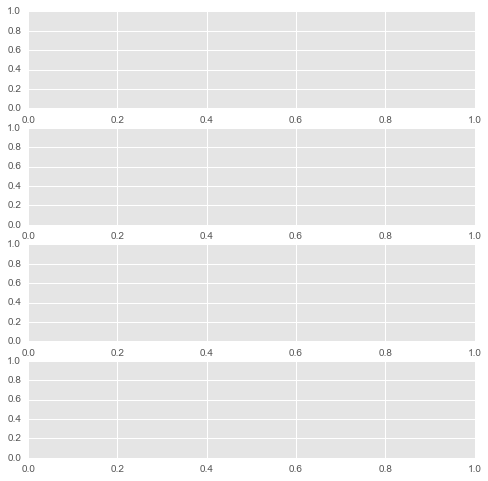

In [266]:
months = MonthLocator(interval=2)
monthsFmt = DateFormatter("%b-%y")
postsW = postsW[postsW.year>2010]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8,8),sharex=False)
ax1.plot_date(postsW['date_month'],postsW['postsCount'],)
ax2.plot_date(postsW['date_month'],postsW['commentsCount'])
ax3.plot_date(postsW['date_month'],postsW['likesCount'])
ax4.plot_date(postsW['date_month'],postsW['sharesCount'])


#ax1.xaxis.set_major_locator(months)
#ax1.xaxis.set_major_formatter(monthsFmt)
#ax1.autoscale_view()
#plt.xticks(rotation = 30)
#ax.set_xlim(datetime.datetime.strptime("2012-10-01","%Y-%m-%d"),datetime.datetime.strptime("2015-12-31","%Y-%m-%d"))
#ax.plot_date(postsW['date_week'],postsW['postsCount'])

#sns.regplot(x=postsY.ts,y=postsY.postsCount,lowess=True)

#sns.regplot(x='date_week',y='postsCount',data=posts,ax=ax)

In [ ]:
posts['date_week']

In [ ]:
from datetime import datetime


In [ ]:
months = MonthLocator(interval=2)
monthsFmt = DateFormatter("%b-%y")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot_date(posts['date_week'],posts_w['postsCount'])
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()

#g = sns.lmplot(x='date_week',y='postsCount',data=posts_w)
ax.set_xlim(datetime.datetime.strptime("2012-10-01","%Y-%m-%d"),datetime.datetime.strptime("2015-12-31","%Y-%m-%d"))


#sns.regplot(posts_w['date_week'],posts_w['postsCount'])

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
A = pd.Series(index=posts_w['date_week'],data=posts_w['postsCount'].values)

In [ ]:
posts=posts_w

In [ ]:
posts.reset_index(inplace=True)

In [ ]:
posts.plot(kind='scatter',x='postsCount',y='a')

In [ ]:
posts.set_index('date_week',inplace=True)

In [ ]:
#posts.drop(posts.index[0],inplace=True)

In [ ]:
posts.plot(kind='scatter',x=list(posts.index),y=posts['postsCount'],subplots=True,figsize=(15,10))


In [ ]:
posts.plot(figsize=(15,10))
#plt.scatter(x=posts.date_week,y=posts.postsCount)


In [117]:
posts.columns

Index(['id', 'url', 'createdTime', 'likesCount', 'commentsCount',
       'sharesCount', 'authorId', 'authorName', 'type', 'year', 'week',
       'month', 'quarter'],
      dtype='object')

In [128]:
postsQ = posts.groupby(['year','quarter']).agg({'likesCount' : np.sum,
                                              'commentsCount' : np.sum,
                                              'sharesCount' : np.sum,
                                              'id': 'count'})
postsQ.rename(columns={'id':'postsCount'},inplace=True)
postsQ['date_quarter'] = [datetime.datetime(a[0],a[1]*3-1,15,0,0) for a in list(postsQ.index)]
#postsQ['date_month'] = [datetime.datetime.strptime(str(a[0])+'-W'+str(a[1]) + '-0', "%Y-W%W-%w") for a in list(postsW.index)]
postsQ.reset_index(inplace=True)
postsQ.sort_index().head(5)

year  quarter  sharesCount  postsCount  likesCount  commentsCount  \
0  2012        4            5          23          96             85   
1  2013        1           57         111         474            989   
2  2013        2          110         363        1998           3187   
3  2013        3          151         477        2502           3948   
4  2013        4          129         447        2684           3963   

  date_quarter  
0   2012-11-15  
1   2013-02-15  
2   2013-05-15  
3   2013-08-15  
4   2013-11-15

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

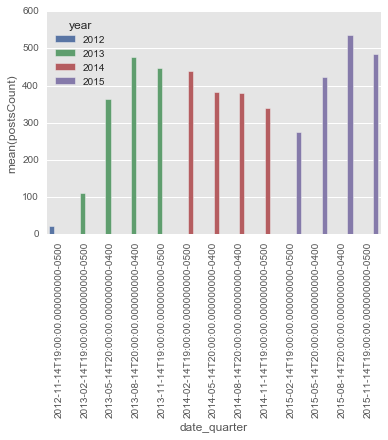

In [272]:
#postsY.reset_index(inplace=True)
#fig, Ax = plt.subplots(2,2,figsize=(10,12))

sns.barplot(y='postsCount',x='date_quarter',data=postsQ,hue='year')
plt.xticks(rotation = 90)


c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


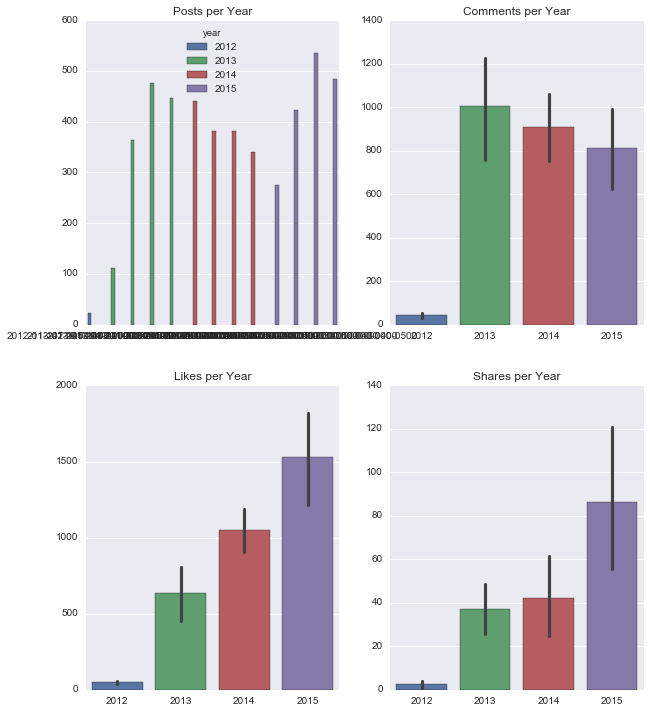

In [132]:
#postsY.reset_index(inplace=True)
fig, Ax = plt.subplots(2,2,figsize=(10,12))

sns.barplot(y='postsCount',x='date_quarter',data=postsQ,ax=Ax[0,0],hue='year')

sns.barplot(y='commentsCount',x='year',data=postsM,ax=Ax[0,1])
sns.barplot(y='likesCount',x='year',data=postsM,ax=Ax[1,0])
sns.barplot(y='sharesCount',x='year',data=postsM,ax=Ax[1,1])

Ax[0,0].set_title('Posts per Year'); Ax[0,0].set_xlabel(''); Ax[0,0].set_ylabel('')
Ax[0,1].set_title('Comments per Year')
Ax[0,1].set_xlabel('')
Ax[0,1].set_ylabel('')
Ax[1,0].set_title('Likes per Year')
Ax[1,0].set_xlabel('')
Ax[1,0].set_ylabel('')
Ax[1,1].set_title('Shares per Year')
Ax[1,1].set_xlabel('')
Ax[1,1].set_ylabel('')

#Dammit, what's the command to turn off axis labels?

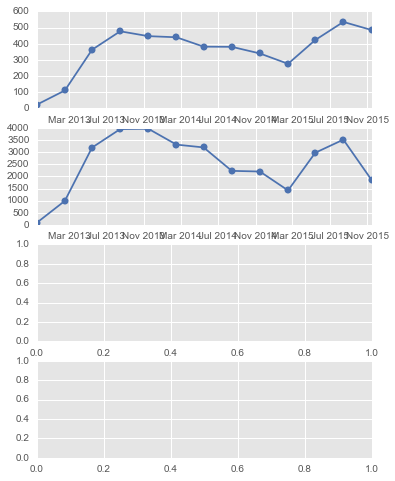

In [231]:
months = MonthLocator(interval=2)
monthsFmt = DateFormatter("%b-%y")
postsW = postsQ[postsQ.year>2012]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(6,8),sharex=False)
ax1.plot_date(postsQ['date_quarter'],postsQ['postsCount'],'-o')
ax2.plot_date(postsQ['date_quarter'],postsQ['commentsCount'],'-o')
#ax2.plot_date(postsW['date_month'],postsW['commentsCount'])
#ax2.plot_date(postsW['date_month'],postsW['commentsCount'])
#ax3.plot_date(postsW['date_month'],postsW['likesCount'])
#ax4.plot_date(postsW['date_month'],postsW['sharesCount'])


#ax1.xaxis.set_major_locator(months)
#ax1.xaxis.set_major_formatter(monthsFmt)
#ax1.autoscale_view()
#plt.xticks(rotation = 30)
#ax.set_xlim(datetime.datetime.strptime("2012-10-01","%Y-%m-%d"),datetime.datetime.strptime("2015-12-31","%Y-%m-%d"))
#ax.plot_date(postsW['date_week'],postsW['postsCount'])

#sns.regplot(x=postsY.ts,y=postsY.postsCount,lowess=True)

#sns.regplot(x='date_week',y='postsCount',data=posts,ax=ax)

In [65]:
postsW = posts.groupby(['year','week']).agg({'likesCount' : np.sum,
                                              'commentsCount' : np.sum,
                                              'sharesCount' : np.sum,
                                              'id': 'count'})
postsW.rename(columns={'id':'postsCount'},inplace=True)
postsW['date_week'] = [datetime.datetime.strptime(str(a[0])+'-W'+str(a[1]) + '-0', "%Y-W%W-%w") for a in list(postsW.index)]
postsW.sort_index()

sharesCount  postsCount  likesCount  commentsCount  date_week
year week                                                               
2012 1               1           1           4              0 2012-01-08
     47              1           5          43             53 2012-11-25
     48              0           6          19              2 2012-12-02
     49              0           3           6              3 2012-12-09
     50              3           3           5             16 2012-12-16
     51              0           3           8              6 2012-12-23
     52              0           2          11              5 2012-12-30
2013 1               1          13          99            114 2013-01-13
     2               7           3          11              4 2013-01-20
     3               0           7           8             22 2013-01-27
     4               0           4          28             45 2013-02-03
     5               7           6          33             10 2013-02-10
     6               7           7          36             28 2013-02-17
     7               3           9          27            147 2013-02-24
     8               1          11          34             52 2013-03-03
     9              24          14          61            171 2013-03-10
     10              2           5          28             33 2013-03-17
     11              5          16          72            147 2013-03-24
     12              1          15          67            114 2013-03-31
     13              0           9          47            172 2013-04-07
     14              3          17          75            156 2013-04-14
     15              0           9          70            104 2013-04-21
     16              3          13          76            155 2013-04-28
     17              7          35         229            332 2013-05-05
     18             30          24         113            264 2013-05-12
     19              4          20          56            186 2013-05-19
     20             10          30         193            183 2013-05-26
     21             12          51         397            380 2013-06-02
     22             19          36         209            267 2013-06-09
     23              3          26         162            268 2013-06-16
...                ...         ...         ...            ...        ...
2015 22              3          20         173            140 2015-06-07
     23              4          33         244            156 2015-06-14
     24             26          28         313            226 2015-06-21
     25             26          40         516            184 2015-06-28
     26             13          36         267            206 2015-07-05
     27             11          34         354            144 2015-07-12
     28             34          30         359            197 2015-07-19
     29             28          37         478            298 2015-07-26
     30             59          51         600            346 2015-08-02
     31             54          44         799            201 2015-08-09
     32             14          46         463            253 2015-08-16
     33            107          50         776            621 2015-08-23
     34              7          39         328            186 2015-08-30
     35              6          34         200            168 2015-09-06
     36             29          41         479            334 2015-09-13
     37             26          56         518            329 2015-09-20
     38              4          23         309            175 2015-09-27
     39             37          47         648            212 2015-10-04
     40              2          39         294            165 2015-10-11
     41             30          40         419            131 2015-10-18
     42             13          41         265            121 2015-10-25
     43             23          29         383            101 2015-11